In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

BASE_DIR = Path("..")
PROCESSED_DIR = BASE_DIR / "processed"

# Cargar dataset con coherencia predictiva (salida del libro 04)
data_path = PROCESSED_DIR / "suelos_coherencia.csv"
print("Cargando datos desde:", data_path.resolve())

df = pd.read_csv(data_path)
print("Dataset cargado:", df.shape)
df.head()


Cargando datos desde: D:\ICD-SOIL\processed\suelos_coherencia.csv
Dataset cargado: (35111, 63)


C:\Users\diego\AppData\Local\Temp\ipykernel_23444\1677352769.py:17: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


,secuencial,fecha_de_an_lisis,departamento,municipio,cultivo,estado,tiempo_de_establecimiento,topografia,drenaje,riego,...,icd_predictivo_sodio_intercambiable,icd_predictivo_cic,icd_predictivo_conductividad_electrica,icd_predictivo_hierro_olsen,icd_predictivo_cobre_disponible,icd_predictivo_manganeso_olsen,icd_predictivo_zinc_olsen,icd_predictivo_boro_disponible,icd_predictivo_hierro_doble_acido,icd_predictivo_manganeso_doble_acido
0,1,2014-07-01,NARIÑO,SAN ANDRÉS DE TUMACO,No Indica,No indica,No indica,No indica,No indica,No indica,...,0.785379,0.955959,0.975207,0.876265,0.878433,0.827458,0.935726,0.936786,NaN,NaN
1,164,2014-05-09,CUNDINAMARCA,UNE,Lulo,Establecido,De 0 a 1 año,Plano,Buen drenaje,Aspersión,...,0.913592,0.981955,0.872979,0.805643,0.977212,0.962776,0.944802,0.787208,NaN,NaN
2,165,2014-05-09,CUNDINAMARCA,UNE,Lulo,Establecido,De 0 a 1 año,Ondulado,Buen drenaje,Aspersión,...,0.950052,0.853240,0.918891,0.678192,0.881316,0.978700,0.894145,0.461749,NaN,NaN
3,166,2014-05-09,CUNDINAMARCA,FUNZA,Guisantes,Por establecer,No indica,Plano,Buen drenaje,Goteo,...,0.874170,0.953051,0.868227,0.930254,0.983721,0.777359,0.230549,0.848395,NaN,NaN
4,167,2014-05-09,VALLE DEL CAUCA,LA UNIÓN,Guanábana,Establecido,Mas de 10 años,Plano,Buen drenaje,Manguera,...,0.512625,0.497408,0.000000,0.996966,0.979277,0.955064,0.942224,0.000000,NaN,NaN


In [2]:
# Variables de suelo de interés
VARIABLES_SUELO = [
    "ph_agua_suelo", "materia_organica", "fosforo_bray_ii", "azufre_fosfato_monocalcico",
    "acidez_intercambiable", "aluminio_intercambiable", "calcio_intercambiable",
    "magnesio_intercambiable", "potasio_intercambiable", "sodio_intercambiable",
    "cic", "conductividad_electrica", "hierro_olsen", "cobre_disponible",
    "manganeso_olsen", "zinc_olsen", "boro_disponible",
    "hierro_doble_acido", "cobre_doble_acido", "manganeso_doble_acido", "zinc_doble_acido"
]

vars_present = [v for v in VARIABLES_SUELO if v in df.columns]
print(f"Variables de suelo presentes en el dataset ({len(vars_present)}):")
print(vars_present)

# Columnas ICD predictivo ya calculadas (libro 04)
icd_pred_cols = [c for c in df.columns if c.startswith("icd_predictivo_")]
print(f"\nColumnas ICD predictivo encontradas ({len(icd_pred_cols)}):")
print(icd_pred_cols[:10])

# Componente de anomalías (libro 03)
if "anom_score_global" not in df.columns:
    raise ValueError("No se encontró 'anom_score_global' en el dataframe. Asegúrate de haber corrido el libro 03 y 04.")

# Columna territorial (para agregaciones posteriores)
group_col = None
if "dep_norm" in df.columns:
    group_col = "dep_norm"
elif "departamento" in df.columns:
    group_col = "departamento"
else:
    raise ValueError("No se encontró ni 'dep_norm' ni 'departamento' en el dataframe.")

print("\nSe usará la columna de agrupación territorial:", group_col)


Variables de suelo presentes en el dataset (20):
['ph_agua_suelo', 'materia_organica', 'fosforo_bray_ii', 'azufre_fosfato_monocalcico', 'acidez_intercambiable', 'aluminio_intercambiable', 'calcio_intercambiable', 'magnesio_intercambiable', 'potasio_intercambiable', 'sodio_intercambiable', 'cic', 'conductividad_electrica', 'hierro_olsen', 'cobre_disponible', 'manganeso_olsen', 'zinc_olsen', 'boro_disponible', 'hierro_doble_acido', 'manganeso_doble_acido', 'zinc_doble_acido']

Columnas ICD predictivo encontradas (19):
['icd_predictivo_ph_agua_suelo', 'icd_predictivo_materia_organica', 'icd_predictivo_fosforo_bray_ii', 'icd_predictivo_azufre_fosfato_monocalcico', 'icd_predictivo_acidez_intercambiable', 'icd_predictivo_aluminio_intercambiable', 'icd_predictivo_calcio_intercambiable', 'icd_predictivo_magnesio_intercambiable', 'icd_predictivo_potasio_intercambiable', 'icd_predictivo_sodio_intercambiable']

Se usará la columna de agrupación territorial: departamento


In [4]:
# Pesos del ICD (deben sumar ~1.0)
w_comp = 0.3   # completitud
w_anom = 0.3   # componente de anomalías
w_pred = 0.4   # coherencia predictiva

print(f"Pesos → completitud: {w_comp}, anomalías: {w_anom}, predictivo: {w_pred}")
print("Suma de pesos:", w_comp + w_anom + w_pred)

# Trabajamos sobre una copia
df_icd = df.copy()

# Componente de anomalías global (0–1, donde 1 = sin anomalías, 0 = muy anómalo)
df_icd["icd_anom_global"] = 1 - df_icd["anom_score_global"]
df_icd["icd_anom_global"] = df_icd["icd_anom_global"].clip(0, 1)

df_icd[["anom_score_global", "icd_anom_global"]].head()


Pesos → completitud: 0.3, anomalías: 0.3, predictivo: 0.4
Suma de pesos: 1.0


,anom_score_global,icd_anom_global
0,0.020202,0.979798
1,0.020100,0.979900
2,0.091361,0.908639
3,0.048277,0.951723
4,0.165614,0.834386


In [5]:
for var in vars_present:
    col_comp = f"icd_comp_{var}"
    col_pred = f"icd_predictivo_{var}"
    col_total = f"icd_total_{var}"

    # 1) Completitud: 1 si hay dato, 0 si falta
    df_icd[col_comp] = np.where(df_icd[var].notna(), 1.0, 0.0)

    # 2) Verificar que exista componente predictivo
    if col_pred not in df_icd.columns:
        print(f"⚠️ No se encontró {col_pred}. El ICD total para '{var}' usará solo completitud + anomalías.")
        icd_pred = pd.Series(index=df_icd.index, dtype=float)  # todo NaN
    else:
        icd_pred = df_icd[col_pred]

    icd_comp = df_icd[col_comp]
    icd_anom = df_icd["icd_anom_global"]

    # 3) Máscara donde SÍ hay componente predictivo
    mask_pred = icd_pred.notna()

    # ICD cuando SÍ hay predicción (usa los tres pesos)
    df_icd.loc[mask_pred, col_total] = (
        w_comp * icd_comp[mask_pred] +
        w_anom * icd_anom[mask_pred] +
        w_pred * icd_pred[mask_pred]
    )

    # ICD cuando NO hay predicción (redistribuimos pesos entre completitud y anomalías)
    if (~mask_pred).any():
        df_icd.loc[~mask_pred, col_total] = (
            (w_comp / (w_comp + w_anom)) * icd_comp[~mask_pred] +
            (w_anom / (w_comp + w_anom)) * icd_anom[~mask_pred]
        )

print("Columnas ICD total creadas, ejemplo:")
[c for c in df_icd.columns if c.startswith("icd_total_")][:10]


⚠️ No se encontró icd_predictivo_zinc_doble_acido. El ICD total para 'zinc_doble_acido' usará solo completitud + anomalías.
Columnas ICD total creadas, ejemplo:


['icd_total_ph_agua_suelo',
 'icd_total_materia_organica',
 'icd_total_fosforo_bray_ii',
 'icd_total_azufre_fosfato_monocalcico',
 'icd_total_acidez_intercambiable',
 'icd_total_aluminio_intercambiable',
 'icd_total_calcio_intercambiable',
 'icd_total_magnesio_intercambiable',
 'icd_total_potasio_intercambiable',
 'icd_total_sodio_intercambiable']

In [6]:
resumen_var = []

for var in vars_present:
    col_total = f"icd_total_{var}"
    if col_total not in df_icd.columns:
        continue

    serie = df_icd[col_total]
    resumen_var.append({
        "variable": var,
        "count": int(serie.notna().sum()),
        "icd_mean": float(serie.mean(skipna=True)),
        "icd_std": float(serie.std(skipna=True)),
        "icd_min": float(serie.min(skipna=True)),
        "icd_p25": float(serie.quantile(0.25)),
        "icd_p50": float(serie.quantile(0.50)),
        "icd_p75": float(serie.quantile(0.75)),
        "icd_max": float(serie.max(skipna=True)),
    })

df_resumen_var = pd.DataFrame(resumen_var).sort_values("icd_mean", ascending=False)
df_resumen_var


,variable,count,icd_mean,icd_std,icd_min,icd_p25,icd_p50,icd_p75,icd_max
10,cic,35111,0.891808,0.118104,3.000000e-01,0.869607,0.935500,0.967224,0.999729
11,conductividad_electrica,35111,0.887052,0.129036,2.131216e-02,0.864272,0.936481,0.968206,0.998292
3,azufre_fosfato_monocalcico,35111,0.885236,0.132672,2.131216e-02,0.868064,0.936721,0.967178,0.999446
1,materia_organica,35111,0.879829,0.117243,2.167811e-01,0.843357,0.923796,0.961030,0.998662
7,magnesio_intercambiable,35111,0.871841,0.147460,1.665195e-01,0.847538,0.933735,0.967771,0.998639
0,ph_agua_suelo,35111,0.869133,0.116250,4.916437e-02,0.824958,0.909331,0.952564,0.998725
16,boro_disponible,35111,0.862611,0.128670,6.924340e-02,0.823138,0.907011,0.951648,0.998639
6,calcio_intercambiable,35111,0.860990,0.153857,1.346706e-01,0.830558,0.925780,0.963443,0.999015
12,hierro_olsen,35111,0.857139,0.156486,3.024385e-02,0.814636,0.925336,0.965016,0.998974
14,manganeso_olsen,35111,0.823518,0.179815,3.024385e-02,0.752188,0.907563,0.953768,0.998492


C:\Users\diego\AppData\Local\Temp\ipykernel_23444\204010837.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resumen_var, x="icd_mean", y="variable", palette="viridis")


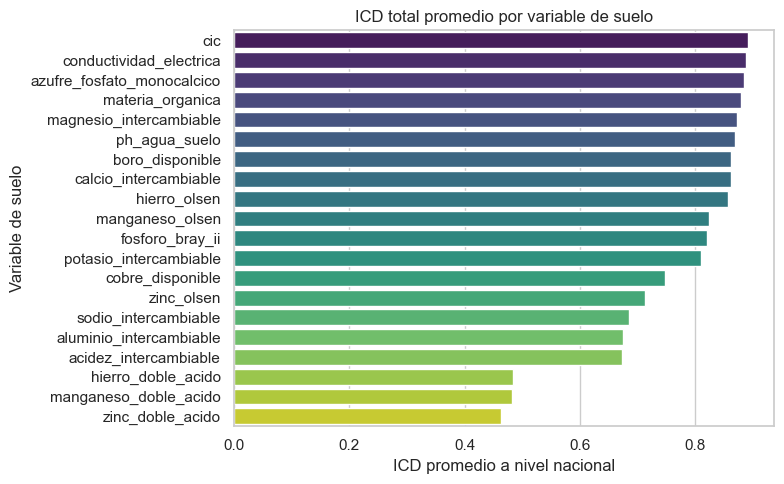

In [7]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_resumen_var, x="icd_mean", y="variable", palette="viridis")
plt.xlabel("ICD promedio a nivel nacional")
plt.ylabel("Variable de suelo")
plt.title("ICD total promedio por variable de suelo")
plt.tight_layout()
plt.show()


In [8]:
# Seleccionar solo columnas de ICD total
icd_total_cols = [c for c in df_icd.columns if c.startswith("icd_total_")]

df_long = df_icd[[group_col] + icd_total_cols].melt(
    id_vars=[group_col],
    value_vars=icd_total_cols,
    var_name="icd_total_var",
    value_name="icd_value"
)

# Extraer el nombre de la variable de suelo
df_long["variable"] = df_long["icd_total_var"].str.replace("icd_total_", "", regex=False)

df_long.head()


,departamento,icd_total_var,icd_value,variable
0,NARIÑO,icd_total_ph_agua_suelo,0.929106,ph_agua_suelo
1,CUNDINAMARCA,icd_total_ph_agua_suelo,0.877950,ph_agua_suelo
2,CUNDINAMARCA,icd_total_ph_agua_suelo,0.798862,ph_agua_suelo
3,CUNDINAMARCA,icd_total_ph_agua_suelo,0.918882,ph_agua_suelo
4,VALLE DEL CAUCA,icd_total_ph_agua_suelo,0.550316,ph_agua_suelo


In [9]:
df_icd_depto_var = (
    df_long
    .groupby([group_col, "variable"])["icd_value"]
    .mean()
    .reset_index()
    .rename(columns={"icd_value": "icd_total_promedio"})
)

df_icd_depto_var.head()


,departamento,variable,icd_total_promedio
0,AMAZONAS,acidez_intercambiable,0.708949
1,AMAZONAS,aluminio_intercambiable,0.711267
2,AMAZONAS,azufre_fosfato_monocalcico,0.850870
3,AMAZONAS,boro_disponible,0.836413
4,AMAZONAS,calcio_intercambiable,0.821647


C:\Users\diego\AppData\Local\Temp\ipykernel_23444\56092323.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_focus, x="icd_total_promedio", y=group_col, palette="mako")


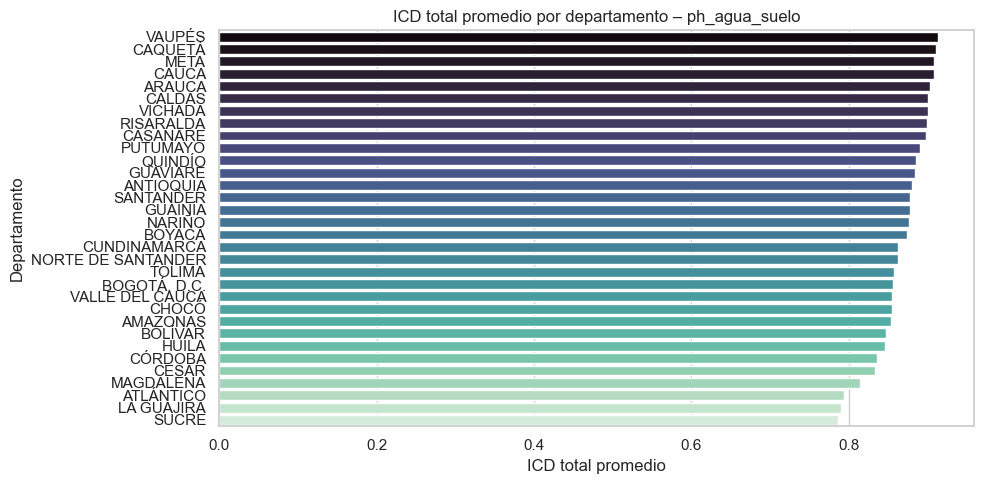

,departamento,variable,icd_total_promedio
615,VAUPÉS,ph_agua_suelo,0.913781
175,CAQUETÁ,ph_agua_suelo,0.911484
415,META,ph_agua_suelo,0.908899
215,CAUCA,ph_agua_suelo,0.908072
55,ARAUCA,ph_agua_suelo,0.904032


In [10]:
# Ejemplo: ranking de ICD por departamento para una variable específica
var_focus = "ph_agua_suelo"  # cambia por otra variable si quieres

df_focus = df_icd_depto_var[df_icd_depto_var["variable"] == var_focus].copy()
df_focus = df_focus.sort_values("icd_total_promedio", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=df_focus, x="icd_total_promedio", y=group_col, palette="mako")
plt.xticks(rotation=0)
plt.ylabel("Departamento")
plt.xlabel("ICD total promedio")
plt.title(f"ICD total promedio por departamento – {var_focus}")
plt.tight_layout()
plt.show()

df_focus.head()


In [11]:
# Dataset a nivel registro (todas las columnas + ICDs)
out_registros = PROCESSED_DIR / "suelos_icd_registro.csv"
df_icd.to_csv(out_registros, index=False, encoding="utf-8")
print("💾 ICD por registro guardado en:", out_registros.resolve())

# Resumen por departamento y variable (para mapas, ranking y dashboard)
out_depto_var = PROCESSED_DIR / "suelos_icd_depto_variable.csv"
df_icd_depto_var.to_csv(out_depto_var, index=False, encoding="utf-8")
print("💾 ICD por departamento y variable guardado en:", out_depto_var.resolve())


💾 ICD por registro guardado en: D:\ICD-SOIL\processed\suelos_icd_registro.csv
💾 ICD por departamento y variable guardado en: D:\ICD-SOIL\processed\suelos_icd_depto_variable.csv
